In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
def matrix_psd(X, fs, nperseg, M):
    N = nperseg//2 + 1
    Psd_m = np.zeros((M, N))  # Matriz para almacenar los PSD
    for i in range(M):
        if X[i].ndim != 1:
            raise ValueError(f"La señal en el índice {i} no es unidimensional. Forma: {X[i].shape}")
        if len(X[i]) < nperseg:
            raise ValueError(f"La señal en el índice {i} es más corta que nperseg. Longitud: {len(X[i])}, nperseg: {nperseg}")
        f, psd = scipy.signal.welch(X[i], fs, nperseg=nperseg)
        Psd_m[i] = psd

    return f, Psd_m

# Extract sample number using regex and sort by sample number
def extract_sample_number(file_name):
    match = re.search(r'sample #(\d+)', file_name)
    if match:
        return int(match.group(1))
    # Return a large number to push files without sample numbers to the end
    return float('inf')

In [3]:
try:
    path_file_folder = r'C:\Samples-Hack-RF'

    # List all files in the folder
    file_list = os.listdir(path_file_folder)

    # Sort files by sample number
    sorted_file_list = sorted(file_list, key=extract_sample_number)

    # Initialize data matrix based on the sorted file list
    exploration_path = os.path.join(path_file_folder, sorted_file_list[0])
    data_exploration = np.load(exploration_path)
    data_matrix = np.zeros((len(sorted_file_list), data_exploration.shape[0]))

    # Load all files into data_matrix
    for pos, file_name in enumerate(sorted_file_list):
        full_path = os.path.join(path_file_folder, file_name)
        data = np.load(full_path)
        #print(f"Loading {file_name} (sample #{extract_sample_number(file_name)}), shape = {data.shape}")
        data_matrix[pos] = data

    print("Data matrix loading complete.")

except FileNotFoundError as fnf_error:
    print(f"Error: {fnf_error}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

C:\Users\david\AppData\Local\Temp\ipykernel_2108\3712461269.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  data_matrix[pos] = data


Data matrix loading complete.


In [4]:
# Parámetros
fs = 20e6  # Frecuencia de muestreo en Hz (20 MHz)
time_sample = 0.01  # Duración total en segundos
num_samples = int(fs * time_sample)
t = np.linspace(0, time_sample, num_samples)
M, N = data_matrix.shape
nperseg = 1024
print('M =',M,'N =',N)

f, psd_matrix = matrix_psd(data_matrix, fs, nperseg, M)

M = 28 N = 200000


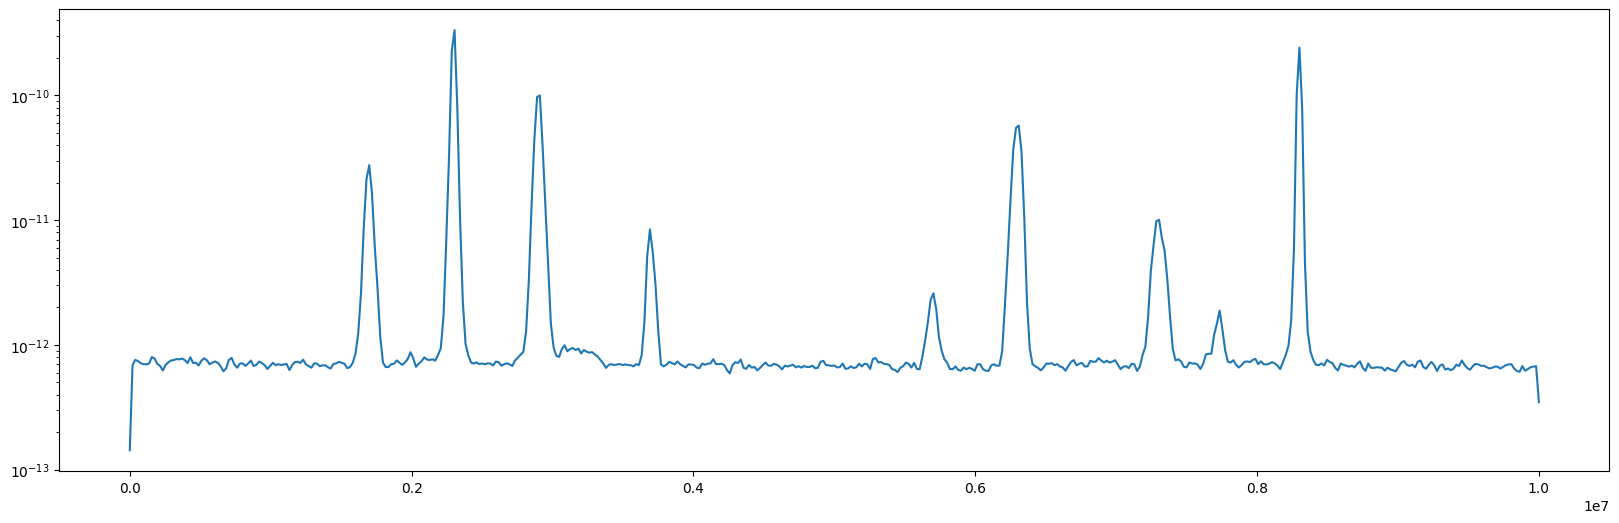

In [5]:
plt.figure(figsize=(20,6))
plt.semilogy(f, psd_matrix[20])
plt.show()

# Método 1. Tabla de estándares
## ITU-R P.372-17 (Pag 4)

$$
P_n = F_a + B - 204 \, \text{dBW}
$$

# (Pag 101)

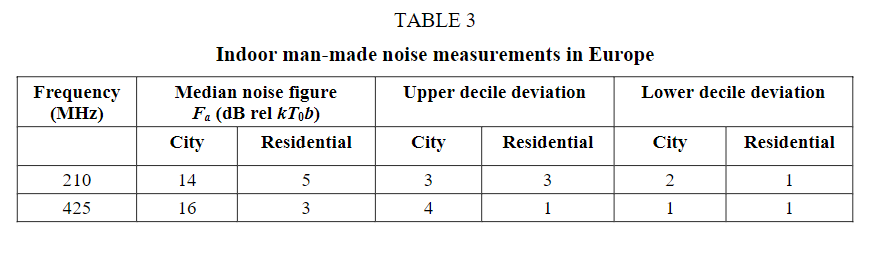




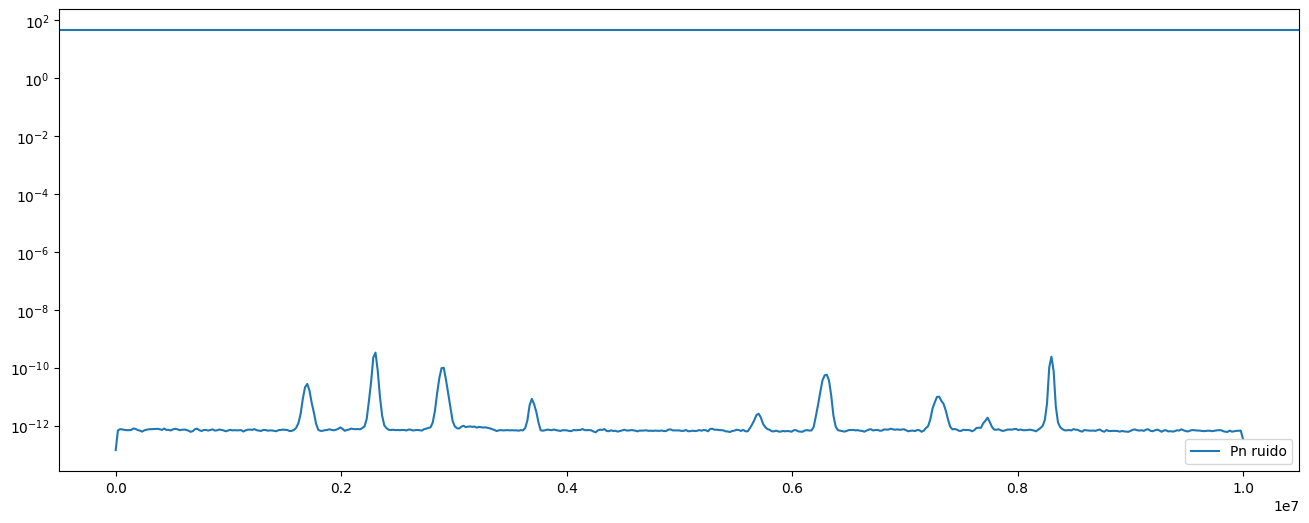

In [16]:
B = fs/(nperseg//2 + 1) #Ancho de banda del ruido
Fa = 14 #dB de la Tabla, caso Ciudad, 210MHz
k = 1.38e-23 #Boltzman constant
To = 290
Pn = Fa + B - 10*np.log10(k*To)

plt.figure(figsize=(16,6))
plt.semilogy(f, psd_matrix[20])
plt.axhline(y=Pn, label='Pn ruido')
plt.legend()
plt.show()

# Método 2.
## SM-1753